In [ ]:
pip install chart-studio

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
chart_data = pd.read_csv("/content/drive/MyDrive/HateSpeechDataSet/data_huang_devansh.csv")
df_chart_data_1 = chart_data[chart_data['Label']==1]
df_chart_data_0 = chart_data[chart_data['Label']==0]
print(df_chart_data_1)
print(df_chart_data_0)

df_500 =  chart_data.loc[chart_data['Content'].str.len() < 500]

                                                  Content  Label
52      `  :Click on my ``Annoying Users`` link! I gue...      1
60              Iraq is not good  ===  ===  USA is bad         1
121     `  Buddha - ``Some suggest that victims should...      1
207       ____ fuck off you little asshole. If you wan...      1
351          i have a dick, its bigger than yours! hahaha      1
...                                                   ...    ...
842316  "Another dumb comment. Put America first befor...      1
842317  "Go use google simpleton, that's how the word ...      1
842325  "Obviously the comic books you read have done ...      1
842328  "Give up jamal jrk off, I would never possibly...      1
842333  "Leave your email or phone number and maybe yo...      1

[133694 rows x 2 columns]
                                                  Content  Label
0       `- This is not ``creative``.  Those are the di...      0
1       `  :: the term ``standard model`` is itself le...      

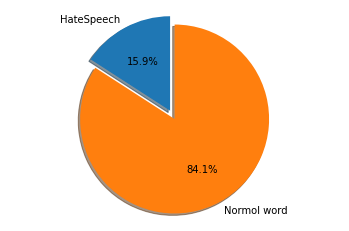

In [ ]:
import matplotlib.pyplot as plt

labels = 'HateSpeech', 'Normol word'
# we need to change the value at here
sizes = [133694, 708641]

# configure the distand between two parts in pie chart
explode = (0, 0.1) 

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio 
plt.axis('equal') 

plt.show()

In [ ]:
import matplotlib.pyplot as plt

list_length = []
list_length_1000 = []
list_length_500 = []
sentence = chart_data['Content']
#842334
for i in range(0,1000):
  sentence_temp = sentence[i]
  word_list = sentence_temp.split(' ')
  len_temp = len(word_list)
  if(len_temp > 500):
    list_length_1000.append(len_temp)
  else:
    list_length_500.append(len_temp) 

#plt.bar(range(len(list_length)),list_length)

#plt.show()

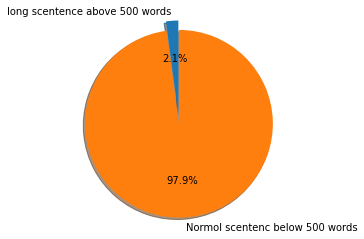

In [ ]:
labels = 'long scentence above 500 words', 'Normol scentenc below 500 words'
sizes = [len(list_length_1000), len(list_length_500)]

# configure the distand between two parts in pie chart
explode = (0, 0.1) 

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio 
plt.axis('equal') 

plt.show()

In [ ]:
!pip install transformers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/HateSpeechDataSet/data_huang_devansh.csv')
#df_500 =  chart_data.loc[chart_data['Content'].str.len() < 500]
df= df_500
batch_1 = df[:100]


# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = batch_1['Content'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

#Padding
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(100, 144)

In [ ]:
#model The model() function runs our sentences through BERT. The results of the processing will be returned into last_hidden_states.
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()
labels = batch_1['Label']
print(features) #t

[[-0.11208873 -0.16358626 -0.5881236  ... -0.29206696  0.2568072
   0.45991987]
 [ 0.08861615  0.01957215 -0.1956819  ...  0.01351093  0.41821492
   0.39396685]
 [-0.23381926 -0.15816206 -0.09679752 ... -0.13558838  0.20720775
   0.5391102 ]
 ...
 [-0.14453968 -0.09357478 -0.34548452 ... -0.19698693  0.3951936
   0.36933017]
 [-0.22326484 -0.01469117 -0.19102502 ... -0.08932787  0.18744636
   0.70028013]
 [ 0.19124754 -0.02844679 -0.23503116 ...  0.09766092  0.44509286
   0.43562305]]
